In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, ttest_ind

# Hypothesis testing: 2-Sample t-test

In this notebook we'll show you how to calculate a two-sample t-test in two different ways
* Firstly, we'll go through the approach manually. This way you can see the maths and reasoning behind what we're doing - this should help with comprehension and help you to design better experiments.
* Secondly, we'll go through the shorter coding way. The computer will do all the work for you, but won't tell you why. It's quicker and easier, but not great for learning and understanding what's happening

# I.&nbsp; The  manual approach

In real-world scenarios, it's often impossible to measure the mean of an entire population due to its size. Therefore, we take a sample instead. However, without knowing the population mean, we can't perform a one-sample t-test. So, what can we do if we want to compare two samples to determine whether one is significantly different from the other? One answer is to conduct a two-sample t-test. This allows us to evaluate whether the means of two samples are significantly different from each other.

To provide context for the example in this notebook, we recommend watching this informative Khan Academy video: https://www.youtube.com/watch?v=NkGvw18zlGQ.

The aim of our experiment is to investigate the impact of two different fertilizers on tomato plants. We applied these fertilizers to the plants in two distinct fields, A and B, and waited for the plants to mature. We then selected two random samples of plants from both fields and measured their heights. Our objective is to determine whether the plants exposed to one of the fertilizers grew taller, on average.


## 1.&nbsp; State the Null Hypothesis and the Alternative Hypothesis.

To correctly state the hypotheses, we once again need to consider whether we are conducting a one- or two-tailed test. We are interested in _any_ of the two fertilizers being better than the other one. Therfore, we will perform a two-tailed test.


Our **null hypothesis ($H_0$)** assumes that the mean height of plants in field A is equal to the mean height of plants in field B.

Our **alternative hypothesis ($H_A$)** suggests that the mean height of plants in field A is different from the mean height of plants in field B.

In mathematical notation:

- $H_0$: $\mu_A$ = $\mu_B$
- $H_A$: $\mu_A$ != $\mu_B$

## 2.&nbsp; Select an appropriate significance level alpha ($\alpha$).

For this hypothesis test we will set alpha to 0.05

In [2]:
alpha = 0.05

## 3.&nbsp; Collect Data that is random and independent

Remember: In statistical tests, it is crucial to ensure randomness and independence. Randomness guarantees that the sample is a fair representation of the population, and independence ensures that each observation in the sample is not influenced by any other observation.

Below is the collected data from both fields:

> Note: To help you follow Khan Academy's video and code along in parallel, we generated two samples with the same means and standard deviations as those of fields A and B.

### The plant heights from field A:

In [3]:
field_a = np.array([1.53021758, 0.70571215, 2.01610148, 1.14367405, 0.93970563,
       1.74358147, 1.72979421, 0.99173825, 1.30784819, 0.18865752,
       1.92501786, 1.79597301, 1.77666206, 0.54937259, 1.13296132,
       1.40105918, 1.60272671, 1.44154697, 1.9605791 , 0.52757822,
       1.19867684, 0.99201533])

print("Mean plant height in field A:", round(np.mean(field_a), 3))
print("Standard deviation of plant heights in field A:", round(np.std(field_a, ddof=1), 3))
print("Number of plants from field A:", len(field_a))

Mean plant height in field A: 1.3
Standard deviation of plant heights in field A: 0.512
Number of plants from field A: 22


### The plant heights from field B:

In [4]:
field_b = np.array([1.65802641, 1.76603167, 1.89544547, 1.45920841, 1.80266623,
       0.80989183, 1.54506744, 1.85769076, 1.48064793, 1.7310313 ,
       1.91207357, 1.71378148, 1.70911519, 1.56339253, 1.63741389,
       1.50316156, 1.85250241, 2.15778815, 1.62285988, 1.43006622,
       1.61084258, 0.97720672, 1.67433766, 1.03085296])

print("Mean plant height in field B:", round(np.mean(field_b), 3))
print("Standard deviation of plant heights in field B:", round(np.std(field_b, ddof=1), 3))
print("Number of plants from field B:", len(field_b))

Mean plant height in field B: 1.6
Standard deviation of plant heights in field B: 0.306
Number of plants from field B: 24


Let's take a look at the difference between the mean heights of the two fields

In [5]:
d = round(np.mean(field_b) - np.mean(field_a), 2)
d

np.float64(0.3)

The difference between the sample means is `0.3`



## 4.&nbsp; Calculate the test result

The two-sample t-test is used to compare the means of two independent samples and determine if they are significantly different, providing evidence that they may come from different populations.

There are two types of two-sample t-tests: the Student's t-test and the Welch's t-test. The Student's t-test assumes that the variances of the two groups being compared are equal, whereas the Welch's t-test does not assume that the variances are equal. In other words, Welch's t-test is more robust and can be used even when the variances of the two groups being compared are different.

The Welch's t-test is often preferred over the Student's t-test because it produces more accurate results in real-world scenarios, where the variances of the two groups being compared can differ significantly. Therefore, we will use the Welch's test in this notebook.

$t = \frac{\bar{x_1} – \bar{x_2}} {\sqrt{\frac{s^2_1}{n_1} + \frac{s^2_2}{n_2}}}$

---

$\bar{x_1}$ = mean of sample 1

$\bar{x_2}$ = mean of sample 2

$s^2_1$ = variance of sample 1

$s^2_2$ = variance of sample 2

$n_1$ = size of sample 1

$n_2$ = size of sample 2

---

$\bar{x_1}$ = mean of sample 1

In [6]:
x_bar_1 = np.mean(field_a)
x_bar_1

np.float64(1.300054532727273)

$\bar{x_2}$ = mean of sample 2

In [7]:
x_bar_2 = np.mean(field_b)
x_bar_2

np.float64(1.6000459270833332)

$s^2_1$ = variance of sample 1

In [8]:
s2_1 = np.var(field_a, ddof=1)
s2_1

np.float64(0.26190883962559636)

$s^2_2$ = variance of sample 2

In [9]:
s2_2 = np.var(field_b, ddof=1)
s2_2

np.float64(0.09392665457965609)

$n_1$ = size of sample 1

In [10]:
n_1 = len(field_a)
n_1

22

$n_2$ = size of sample 2

In [11]:
n_2 = len(field_b)
n_2

24

Calculate the t-score with the values from above

In [12]:
t_score = (x_bar_1 - x_bar_2) / np.sqrt((s2_1 / n_1) + (s2_2 / n_2))
t_score

np.float64(-2.3852030326883225)

Who remembers what the t-score tells us?

## 5.&nbsp; Interpret the test result

In a two-sample t-test the degrees of freedom are crucial as they determine the appropriate t-distribution when comparing the t-score to the alpha level. In the case of Welch's t-test, which accommodates varying variances, the formula for degrees of freedom is:

$$
\text{Degrees of Freedom (df)} = \frac{\left(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}\right)^2}{\frac{\left(\frac{s_1^2}{n_1}\right)^2}{n_1 - 1} + \frac{\left(\frac{s_2^2}{n_2}\right)^2}{n_2 - 1}}
$$

Having already computed the means, variances, and sample sizes, we can now easily make this calculation.

In [13]:
numerator = ((s2_1 / n_1) + (s2_2 / n_2))**2
denominator = ((s2_1 / n_1)**2 / (n_1 - 1)) + ((s2_2 / n_2)**2 / (n_2 - 1))
degrees_of_freedom = numerator / denominator

print("Degrees of Freedom:", degrees_of_freedom)

Degrees of Freedom: 33.74661830254566


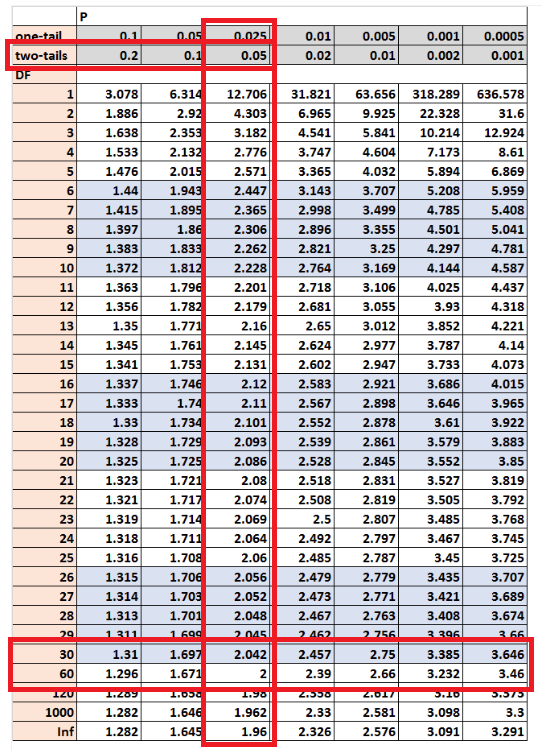

In [14]:
critical_value = 2.038

Is this greater or smaller than our t-score?

In [15]:
t_score

np.float64(-2.3852030326883225)

Does this mean that we accept or reject the null hypothesis?

Let's create a visual representation of our findings by plotting these values on the sampling distribution of differences between means under the assumption that the null hypothesis is true. This should help to understand the numbers better.

Remember, we would obtain the sampling distribution by taking many samples from field A and field B and, for every pair of samples, computing the difference between their means. The Central Limit Theorem tells us that this distribution is going to be approximately normal, and since we're performing a t-test, we will use a t-distribution. That t-distribution has three parameters:

- The mean
- The standard deviation
- The degrees of freedom

Let's go through them:

- **The mean**. If the null hypothesis is true, then the sampling distribution of differences will be centered around **zero**.
- **The standard deviation**. The standard deviation of a sampling distribution is called standard error. We will compute it with the following formula:

$SE = \sqrt{\frac{{s_1}^2}{n_1} + \frac{{s_2}^2}{n_2}}$






In [16]:
se = np.sqrt(s2_1/n_1 + s2_2/n_2)
se

np.float64(0.125771848452643)

- The degrees of freedom

In [17]:
degrees_of_freedom

np.float64(33.74661830254566)

Observe the shaded area in blue under the distribution curve, which encompasses all the values on the x-axis that are more extreme than our critical values. This shaded area represents the alpha level, which corresponds to approximately 5% of the total area under the curve.

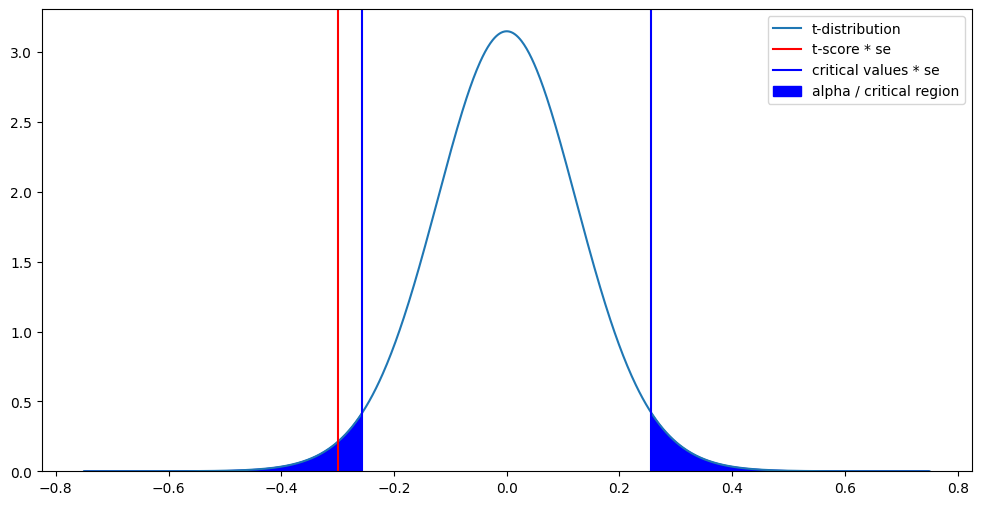

In [18]:
"""
We intentionally placed this code within a form to ensure you stayed focused
on the main topic. However, if you’re interested in exploring Matplotlib further,
you can ask ChatGPT to explain the code line by line, ensuring you understand
everything being used here. There are also plenty of free courses and YouTube
videos available on Matplotlib.

Our suggestion, though, is not to attempt to learn everything about Matplotlib
in one go — you’ll likely forget most of it and end up googling for answers like
the rest of us. Instead, adopt a curious mindset. When you encounter Matplotlib
code, take the time to examine and understand it, but don’t linger. Over time,
this approach helps you gradually discover what’s possible with Matplotlib and
develop your intuition.
"""

#@title t-distribution, t-score and critical region
plt.figure(figsize=(12,6))
# Create a linear space from -5 to 5 with 1000 intervals for our x-axis.
xt = np.linspace(-0.75,0.75,1000)
# Plot a t-distribution with the degrees of freedom from our sample.
plt.plot(xt,
         t.pdf(xt,
               loc=0,
               scale=se,
               df=degrees_of_freedom),
         label="t-distribution")

# Add a vertical line for the t-score.
plt.axvline(0+se*t_score,
           color="red",
           label="t-score * se")

# Add vertical lines for the critical values.
plt.axvline(0-se*critical_value,
           color="blue",
           label="critical values * se")

plt.axvline(0+se*critical_value,
           color="blue")

# Shade the area under the curve for values more extreme than +/-the critical value (= alpha).
plt.fill_between(xt,
                 t.pdf(xt,loc=0,scale=se,df=degrees_of_freedom),
                 where=(-critical_value*se>xt)|(xt>critical_value*se),
                 color= "b",
                 label="alpha / critical region")
# Set y axis to start at 0
plt.ylim(bottom=0)

plt.legend()
plt.show()

The test statistic is more extreme than one of the critical values, falling in the critical region.

Consequently, we reject the Null Hypothesis.

Based on this result, we can infer that the disparity in plant heights between the different fields is not merely a random occurrence. Instead, it is probable that the usage of different fertilizers has influenced the varying heights observed among the plants in these fields.

# II. The coder's approach
The faster way is to use [scipy's function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) to perform 2-sample t-tests.

To determine whether or not to reject the Null Hypothesis, it is common to compare the alpha to the so-called p-value (instead of comparing the test statistic to the critical value).

> **Note**: Whether you compare alpha to the p-value, or the test statistic to the critical value(s), it is a matter of personal taste. The result itself will always be the same. You can see this in the chart below:



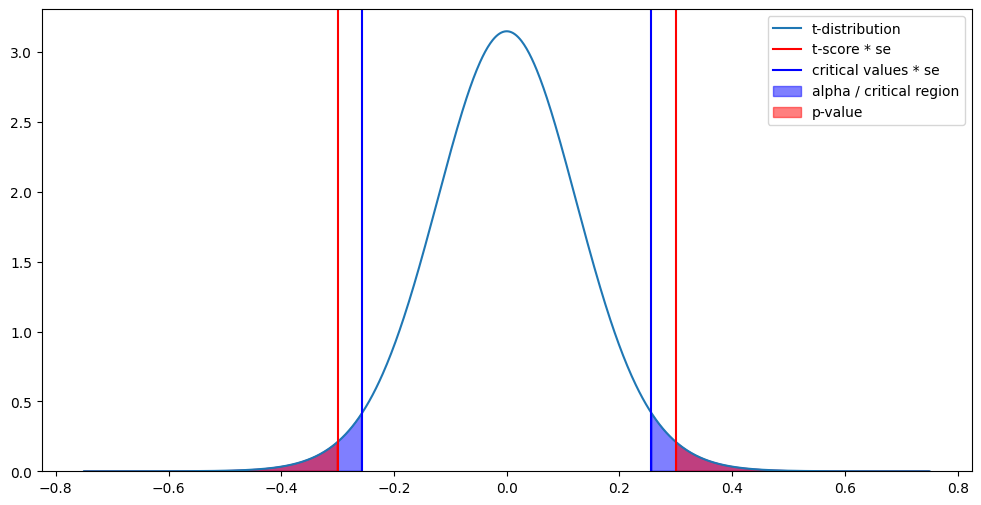

In [19]:
"""
We intentionally placed this code within a form to ensure you stayed focused
on the main topic. However, if you’re interested in exploring Matplotlib further,
you can ask ChatGPT to explain the code line by line, ensuring you understand
everything being used here. There are also plenty of free courses and YouTube
videos available on Matplotlib.

Our suggestion, though, is not to attempt to learn everything about Matplotlib
in one go — you’ll likely forget most of it and end up googling for answers like
the rest of us. Instead, adopt a curious mindset. When you encounter Matplotlib
code, take the time to examine and understand it, but don’t linger. Over time,
this approach helps you gradually discover what’s possible with Matplotlib and
develop your intuition.
"""

#@title t-distribution, t-score, critical region and alpha

#@title t-distribution, t-score and critical region
plt.figure(figsize=(12,6))
# Create a linear space from -5 to 5 with 1000 intervals for our x-axis.
xt = np.linspace(-0.75,0.75,1000)
# Plot a t-distribution with the degrees of freedom from our sample.
plt.plot(xt,
         t.pdf(xt,
               loc=0,
               scale=se,
               df=degrees_of_freedom),
         label="t-distribution")

# Add a vertical line for the t-score (upper side).
plt.axvline(0-se*t_score,
           color="red",
           label="t-score * se")

# Add a vertical line for the t-score (lower side).
plt.axvline(0+se*t_score,
           color="red")

# Add vertical lines for the critical values.
plt.axvline(0-se*critical_value,
           color="blue",
           label="critical values * se")

plt.axvline(0+se*critical_value,
           color="blue")

# Shade the area under the curve for values more extreme than +/-the critical value (= alpha).
plt.fill_between(xt,
                 t.pdf(xt,loc=0,scale=se,df=degrees_of_freedom),
                 where=(-critical_value*se>xt)|(xt>critical_value*se),
                 color= "b",
                 label="alpha / critical region",
                 alpha=0.5
                 )

# Shade the region in the tails that is more extreme than the +/-t-score (= p-value).
plt.fill_between(xt,
                 t.pdf(xt,loc=0,scale=se,df=degrees_of_freedom),
                 where=(-abs(t_score*se)>xt)|(xt>abs(t_score*se)),
                 color= "r",
                 label="p-value",
                 alpha=0.5
                 )


# Set y axis to start at 0
plt.ylim(bottom=0)

plt.legend()
plt.show()

Let's look at a practical example highlighting the importance of understanding mathematical principles rather than relying solely on computer code. In various statistical tests, default assumptions are made, such as assuming equal variances between groups to simplify calculations. Nevertheless, in real-world scenarios, this assumption of equal variances may not hold true, as we observed in the case of the student's t-test and Welch's t-test. In such situations, it becomes necessary to explicitly set the parameter `equal_var` to `False`. Neglecting to do so can potentially lead to misleading or inaccurate results.

In [20]:
tscore_2, pvalue_2 = ttest_ind(a = field_a, b = field_b, alternative='two-sided', equal_var=False)

In [21]:
tscore_2

np.float64(-2.3852030326883225)

In [22]:
pvalue_2

np.float64(0.02283224081368607)

In [23]:
if pvalue_2 > alpha:
  print("The p-value is larger than alpha.")
else:
  print("The p-value is smaller than alpha.")

The p-value is smaller than alpha.


Does this mean that we should reject the Null Hypothesis - or not?




Since the p-value is smaller than the alpha, we reject the Null Hypothesis.

> Remember: **If the p is low, the Null must go!**

# III.&nbsp; Exercise

You have created an an experiment with two versions of a webpage. The metric you compare is the session time each user stays on the page.

If your confidence level is 90%, is there a statistically significant difference between the two pages?

In [24]:
# session_times.csv
url = 'https://drive.google.com/file/d/1nYRMCgv3OKaiIUDBPgq-EnE2sWhgrJI3/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
session_times = pd.read_csv(path)

session_times.head()

,Page,Time
0,Page A,21.0
1,Page B,253.0
2,Page A,35.0
3,Page B,71.0
4,Page A,67.0


In [25]:
session_times.Page.value_counts()

,count
Page,
Page A,21
Page B,15


### Exercise solution

Follow these steps

1. State the Null and the Alternative Hypotheses.

2. Define your alpha.

3. Collect data that is random and independent.

5. Calculate the test result

6. Interpret the test result

#### 1. State the Null and the Alternative Hypotheses.

Null Hypothesis: there is no difference between the session times of the two pages

Alternative Hypothesis: there is a difference between the session times of the two pages



#### 2. Define and interpret your alpha.

In [26]:
alpha_3 = 0.1

#### 3. Collect data that is random and independent.

> It might help for the next step to have a seperate Series for each page

In [27]:
page_a = session_times.loc[session_times.Page=="Page A", "Time"]
page_b = session_times.loc[session_times.Page=="Page B", "Time"]

#### 4. Calculate the test result.

> You can use scipy for this

In [31]:
t_statistic, pvalue_3 = ttest_ind(a = page_a, b = page_b, alternative='two-sided', equal_var=False)
t_statistic, pvalue_3

(np.float64(-1.098315562363811), np.float64(0.2815243724570064))

#### 5. Interpret the test result.

In [29]:
if pvalue_3 > alpha_3:
  print("We do not reject the null hypothesis")
else:
  print("We reject the null hypothesis")

We do not reject the null hypothesis
